In [1]:
import pandas as pd
import numpy as np
import os

## Load data

In [2]:
BASE_PATH = '/root/work/artwork_sequence/train_test_configuration'
DATASET_PATH = '/root/work/datasets/'

CURATORNET_DATA_PATH = os.path.join(DATASET_PATH,'curatornet_data')

**Load purchases metadata**

In [3]:
df_ugallety_purchases = pd.read_csv(os.path.join(CURATORNET_DATA_PATH, 'ugallery_purchases.csv'))
df_ugallety_purchases.head()

,user_id_hash,purchase_timestamp,purchased_artwork_ids_hash
0,faaecc910173fcca8b146c66db26b99f,1416,['f196009db1ba9607150abf0570e0fffe']
1,90d6d470c21861aaa739b2811ac0df3c,1418,['ccccb1b02d3130e435e05a4eea7d11fd']
2,67c7793eefa4aca1cd9a18029b26efc6,1420,['7bbc45a178aef2c041f4376ecdc26b23']
3,8c872e88b91f7077527d8c7bf8892fbd,1424,['5775ae42d3cef7ea7f56b800a8d7cffc']
4,0df5dbca3f2feb725c6a5d410d7b8617,1427,['33a6be0dba2afaae343967d2a6a80964']


In [4]:
from ast import literal_eval

#necessary to cast the list
df_ugallety_purchases['purchased_artwork_ids_hash'] = df_ugallety_purchases['purchased_artwork_ids_hash'].apply(literal_eval)

In [5]:
print(df_ugallety_purchases.shape)

(4897, 3)


In [6]:
print(len(df_ugallety_purchases['user_id_hash'].unique()))

2919


In [7]:
df_ugallety_purchases['purchase_timestamp'].dtype

dtype('int64')

In [8]:
df_ugallety_purchases['purchased_artwork_ids_hash'].dtype

dtype('O')

In [9]:
df_ugallety_purchases['purchased_artwork_ids_hash'][0]

['f196009db1ba9607150abf0570e0fffe']

### Load inventory

**Load inventory metadata**

In [10]:
df_ugallety_inventory = pd.read_csv(os.path.join(CURATORNET_DATA_PATH, 'ugallery_inventory.csv'))
df_ugallety_inventory.head()

,artwork_id_hash,artist_id_hash,upload_timestamp
0,9338d925a4f391d049f1cb55be83206d,ac648ab20e0c330dcfaa912644abcc2f,0
1,6ff620bdd4b7143ef7ef9a43ae35379f,dfc6c382d6584b22b5ba75c62cdb0c56,0
2,ec4708be07b9b92dfd3c98b92d5b273e,e836b4d62ec611a38ce9dd6e394a65e1,1
3,bb8fe17afcd2b8a8700155b79980a7d9,942050a4fd56327fb69ecb8b81948ded,2
4,6e4d56f3158cb58ec8879a89c822a2fa,6db6ff91c3f32433405a103ff4748703,2


In [11]:
print(df_ugallety_inventory.shape)

(7742, 3)


**Load inventory embeddings matrix**

In [12]:
artwork_embeddings_matrix = np.load(os.path.join(CURATORNET_DATA_PATH, 'ugallery_resnet50_embeddings.npy'), allow_pickle=True)
artwork_embeddings_matrix.shape

(13297, 2)

In [13]:
artwork_embeddings_matrix[0][1].shape

(2048,)

**Put inventory embeddings into a Dataframe**

In [14]:
df_artwork_embeddings = pd.DataFrame({'artwork_id_hash':[], 'embedding':[]})
df_artwork_embeddings

for i in range(len(artwork_embeddings_matrix)):
    df_artwork_embeddings = df_artwork_embeddings.append({
        'artwork_id_hash': artwork_embeddings_matrix[i][0],
        'embedding': artwork_embeddings_matrix[i][1]
    },
    ignore_index=True)
    
df_artwork_embeddings.head()

,artwork_id_hash,embedding
0,c387b61cb93fb3582a4142462c1def76,"[0.1990714818239212, 0.006244166754186153, 0.0..."
1,0564f934173235e66f4b0a7c67676b07,"[0.03063206374645233, 1.3171874284744263, 0.04..."
2,33bab6152af45e0c885e3f7e63376402,"[0.008715911768376827, 0.25640636682510376, 0...."
3,06464f49577d4df1937b4ef4e6c98806,"[1.179708480834961, 0.0721529871225357, 0.0287..."
4,490730a98a83f150a6fd967993762eb3,"[0.1705358475446701, 0.0, 0.0, 0.0654701590538..."


**Find embeddings for artwoks in the inventory**

In [15]:
df_embeddings_inventory = df_artwork_embeddings[df_artwork_embeddings['artwork_id_hash'].isin(df_ugallety_inventory['artwork_id_hash'])]
df_embeddings_inventory.head()

,artwork_id_hash,embedding
0,c387b61cb93fb3582a4142462c1def76,"[0.1990714818239212, 0.006244166754186153, 0.0..."
1,0564f934173235e66f4b0a7c67676b07,"[0.03063206374645233, 1.3171874284744263, 0.04..."
3,06464f49577d4df1937b4ef4e6c98806,"[1.179708480834961, 0.0721529871225357, 0.0287..."
4,490730a98a83f150a6fd967993762eb3,"[0.1705358475446701, 0.0, 0.0, 0.0654701590538..."
7,6c400d5c59a663a9d6ed9ae0eb236f68,"[0.21649250388145447, 0.18539881706237793, 0.0..."


In [16]:
df_embeddings_inventory.shape

(7742, 2)

## AVA dataset

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Basic information**

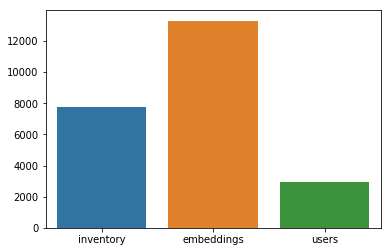

In [18]:
inventory = len(df_ugallety_inventory['artwork_id_hash'].unique())
embeddings = len(df_artwork_embeddings['artwork_id_hash'].unique())
users = len(df_ugallety_purchases['user_id_hash'].unique())

sns.barplot(x=['inventory', 'embeddings', 'users'],y=[inventory,embeddings, users])

**Purchase's distribution per user**

In [19]:
purchases_per_user = df_ugallety_purchases.groupby('user_id_hash').count()['purchased_artwork_ids_hash']
purchases_per_user = purchases_per_user.rename('purchases')
purchases_per_user.head()

user_id_hash
000175ea2475cf82bbd483aea9d66a5c     1
000d30d70c64dda2c97c78769844843d     3
0024f0ac16006eb8314f60230156f3f9     1
0026cfda7eec74c9087bf1fc96a21ad4     6
002dc725ee583da01a00c4031552064c    21
Name: purchases, dtype: int64

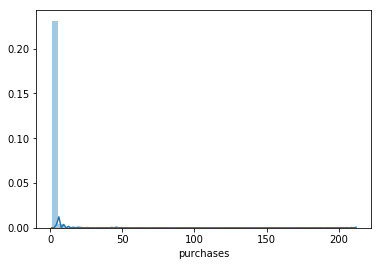

In [20]:
sns.distplot(purchases_per_user)

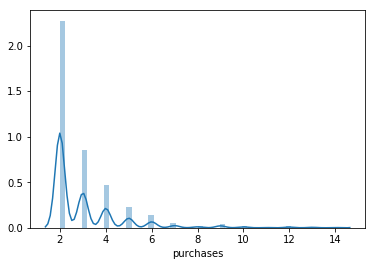

In [21]:
sns.distplot(purchases_per_user[(1<purchases_per_user) & (purchases_per_user<15)])

## Find user sequence

**Take purchase sequence with, at least, 3 purchases**

In [22]:
purchases_per_user_greater_than = purchases_per_user[(2<purchases_per_user)]
purchases_per_user_greater_than.head()

user_id_hash
000d30d70c64dda2c97c78769844843d     3
0026cfda7eec74c9087bf1fc96a21ad4     6
002dc725ee583da01a00c4031552064c    21
00a117bf90fa4cce171cdaf3f82990ab     4
00b46c48bb90dae8fcff3d6779f45644     5
Name: purchases, dtype: int64

In [23]:
df_ugallety_purchases_greather_than = df_ugallety_purchases[df_ugallety_purchases['user_id_hash'].isin(purchases_per_user_greater_than.index)]
df_ugallety_purchases_greather_than.head()

,user_id_hash,purchase_timestamp,purchased_artwork_ids_hash
4,0df5dbca3f2feb725c6a5d410d7b8617,1427,[33a6be0dba2afaae343967d2a6a80964]
5,e1e1a69aa5871973082028492101f119,1428,[b6fc99a3b0e095c4527950607d09c5a4]
6,bc3fa64cc02d8f346493cfefa069158e,1429,[96e2f95e86c78832f8c583ea3af06bd1]
10,7ad6745f3bbd4381a711599703623c88,1439,[b512e5ecc5cc4616731ce60e00bb731e]
13,97b4a760b728bcc465e3d7456b0c6a9a,1448,[20d0fe19c82d11417c5e9900a2987710]


## Define dataset

**Helper functions**

In [24]:
def get_dataframe():
    return pd.DataFrame(
    {
        'user_id_hash':[],
        'purchase_timestamp':[],
        'purchased_artwork_ids_hash':[]
    
    })

In [25]:
def split_into_multiple_columns(df_timeline_purchase):
    
    #Dataframe to return
    df_timeline_purchase_single_value = pd.DataFrame(
    {
        'user_id_hash':[],
        'purchase_timestamp':[],
        'purchased_artwork_id_hash':[]
    
    })
    
    #Iterate over each row
    for index, row in df_timeline_purchase.iterrows():
        #Split purchases
        for i in range(len(row['purchased_artwork_ids_hash'])):
            df_timeline_purchase_single_value = df_timeline_purchase_single_value.append({
                'user_id_hash': row['user_id_hash'],
                'purchase_timestamp': row['purchase_timestamp'],
                'purchased_artwork_id_hash':row['purchased_artwork_ids_hash'][i]
            },
            ignore_index=True)
    
    return df_timeline_purchase_single_value


In [26]:
def get_embedding(x, df_embeddings_inventory):

    emb = df_embeddings_inventory[df_embeddings_inventory['artwork_id_hash'] == x]['embedding']
    return emb.values[0]

### Last purchase dataset

**Generate sequence dataset**

In [27]:
#Split into train and test
df_timeline_purchase_train = get_dataframe()
df_timeline_purchase_test = get_dataframe()

#Group purchases by user id
purchased_grouped = df_ugallety_purchases_greather_than.groupby('user_id_hash')

for user_id, df in purchased_grouped:
    #sort by purchase timestamp
    df_sorted = df.sort_values('purchase_timestamp', axis=0)
    
    #concat results
    df_timeline_purchase_train = pd.concat([df_timeline_purchase_train, df_sorted.iloc[:-1]], sort=True)
    
    df_timeline_purchase_test = df_timeline_purchase_test.append(df_sorted.iloc[-1], ignore_index=True, sort=True)

In [28]:
df_timeline_purchase_train.head()

,purchase_timestamp,purchased_artwork_ids_hash,user_id_hash
721,3179.0,"[46cc289e8e526da4537bb323174ea634, b69c9c3a4a5...",000d30d70c64dda2c97c78769844843d
852,3471.0,[a215668a82da104a936dd54d98048424],000d30d70c64dda2c97c78769844843d
1269,4332.0,[ec9865933f6e7dd4957186cd6d25f592],0026cfda7eec74c9087bf1fc96a21ad4
1299,4399.0,[87a4e4fb1f97fd93cf1c1170f463a8ee],0026cfda7eec74c9087bf1fc96a21ad4
1325,4446.0,[90054fca370e406c9654e507dc5e1688],0026cfda7eec74c9087bf1fc96a21ad4


In [29]:
df_timeline_purchase_test.head()

,purchase_timestamp,purchased_artwork_ids_hash,user_id_hash
0,3474.0,[f6128fa6760b35b479edc6e7b7f48bee],000d30d70c64dda2c97c78769844843d
1,9005.0,[505bc35f0cce5292a09e606768e09da1],0026cfda7eec74c9087bf1fc96a21ad4
2,7059.0,[7869559edaa438c628d9f9da66260007],002dc725ee583da01a00c4031552064c
3,12468.0,[5d51971d5dbcff63b8b2371d5f52e65c],00a117bf90fa4cce171cdaf3f82990ab
4,9108.0,[feeea5252425a5bdafff5389b9ac5850],00b46c48bb90dae8fcff3d6779f45644


**Split purchased artworks into multiple columns**

In [30]:
df_timeline_purchase_train = split_into_multiple_columns(df_timeline_purchase_train)
df_timeline_purchase_train.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash
0,3179.0,46cc289e8e526da4537bb323174ea634,000d30d70c64dda2c97c78769844843d
1,3179.0,b69c9c3a4a54d64359e4e33ff7af89b2,000d30d70c64dda2c97c78769844843d
2,3179.0,17f864ccb6505a49768f3c4c9cea19aa,000d30d70c64dda2c97c78769844843d
3,3471.0,a215668a82da104a936dd54d98048424,000d30d70c64dda2c97c78769844843d
4,4332.0,ec9865933f6e7dd4957186cd6d25f592,0026cfda7eec74c9087bf1fc96a21ad4


In [31]:
df_timeline_purchase_test = split_into_multiple_columns(df_timeline_purchase_test)
df_timeline_purchase_test.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash
0,3474.0,f6128fa6760b35b479edc6e7b7f48bee,000d30d70c64dda2c97c78769844843d
1,9005.0,505bc35f0cce5292a09e606768e09da1,0026cfda7eec74c9087bf1fc96a21ad4
2,7059.0,7869559edaa438c628d9f9da66260007,002dc725ee583da01a00c4031552064c
3,12468.0,5d51971d5dbcff63b8b2371d5f52e65c,00a117bf90fa4cce171cdaf3f82990ab
4,9108.0,feeea5252425a5bdafff5389b9ac5850,00b46c48bb90dae8fcff3d6779f45644


**Append the embedding**

In [32]:
df_timeline_purchase_train['embedding'] = df_timeline_purchase_train['purchased_artwork_id_hash'].apply(get_embedding, df_embeddings_inventory=df_embeddings_inventory)
df_timeline_purchase_train.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash,embedding
0,3179.0,46cc289e8e526da4537bb323174ea634,000d30d70c64dda2c97c78769844843d,"[0.029932459816336632, 0.940303385257721, 0.32..."
1,3179.0,b69c9c3a4a54d64359e4e33ff7af89b2,000d30d70c64dda2c97c78769844843d,"[0.0426417775452137, 0.2854911983013153, 0.169..."
2,3179.0,17f864ccb6505a49768f3c4c9cea19aa,000d30d70c64dda2c97c78769844843d,"[0.15591482818126678, 0.0, 0.01448272727429866..."
3,3471.0,a215668a82da104a936dd54d98048424,000d30d70c64dda2c97c78769844843d,"[0.17633764445781708, 0.0, 0.02903390489518642..."
4,4332.0,ec9865933f6e7dd4957186cd6d25f592,0026cfda7eec74c9087bf1fc96a21ad4,"[2.979443311691284, 1.8889333009719849, 0.2755..."


In [33]:
df_timeline_purchase_test['embedding'] = df_timeline_purchase_test['purchased_artwork_id_hash'].apply(get_embedding, df_embeddings_inventory=df_embeddings_inventory)
df_timeline_purchase_test.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash,embedding
0,3474.0,f6128fa6760b35b479edc6e7b7f48bee,000d30d70c64dda2c97c78769844843d,"[0.2322317212820053, 0.039951227605342865, 0.3..."
1,9005.0,505bc35f0cce5292a09e606768e09da1,0026cfda7eec74c9087bf1fc96a21ad4,"[0.2890149652957916, 0.3374137878417969, 0.121..."
2,7059.0,7869559edaa438c628d9f9da66260007,002dc725ee583da01a00c4031552064c,"[0.18037135899066925, 0.2207290083169937, 0.0,..."
3,12468.0,5d51971d5dbcff63b8b2371d5f52e65c,00a117bf90fa4cce171cdaf3f82990ab,"[0.07336143404245377, 0.09743131697177887, 0.1..."
4,9108.0,feeea5252425a5bdafff5389b9ac5850,00b46c48bb90dae8fcff3d6779f45644,"[1.1278334856033325, 0.3756658136844635, 0.0, ..."


### User sequence purchase dataset

**Split users into train and test**

In [34]:
from sklearn.model_selection import train_test_split

users_id = list(df_ugallety_purchases_greather_than['user_id_hash'].unique())

X_train, X_test = train_test_split(users_id)
len(X_train)

253

In [35]:
df_user_sequence_purchase_train = df_ugallety_purchases_greather_than[df_ugallety_purchases_greather_than['user_id_hash'].isin(X_train)]
df_user_sequence_purchase_train.shape

(1506, 3)

In [36]:
df_user_sequence_purchase_test = df_ugallety_purchases_greather_than[df_ugallety_purchases_greather_than['user_id_hash'].isin(X_test)]
df_user_sequence_purchase_test.shape

(420, 3)

**Split purchased artworks into multiple columns**

In [37]:
df_user_sequence_purchase_train = split_into_multiple_columns(df_user_sequence_purchase_train)
df_user_sequence_purchase_train.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash
0,1428.0,b6fc99a3b0e095c4527950607d09c5a4,e1e1a69aa5871973082028492101f119
1,1439.0,b512e5ecc5cc4616731ce60e00bb731e,7ad6745f3bbd4381a711599703623c88
2,1448.0,20d0fe19c82d11417c5e9900a2987710,97b4a760b728bcc465e3d7456b0c6a9a
3,1450.0,7a48b7d1c5c60047b2f39f966155873b,97b4a760b728bcc465e3d7456b0c6a9a
4,1451.0,48a15ae11b45c34a5f5fc4f0238f4993,8978960088332a2535ecb53b3cd2c318


In [38]:
df_user_sequence_purchase_test = split_into_multiple_columns(df_user_sequence_purchase_test)
df_user_sequence_purchase_test.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash
0,1427.0,33a6be0dba2afaae343967d2a6a80964,0df5dbca3f2feb725c6a5d410d7b8617
1,1429.0,96e2f95e86c78832f8c583ea3af06bd1,bc3fa64cc02d8f346493cfefa069158e
2,1460.0,038c496d2f4f7aad5cd384fb96e80cd8,bc3fa64cc02d8f346493cfefa069158e
3,1460.0,6b45dad03e81e18c3fce0c6f3b17a3da,bc3fa64cc02d8f346493cfefa069158e
4,1604.0,932b0e079203f6cd40fa1cb3940b4dad,e72b4e71331bd76a0aec5434609b4103


**Append the embedding**

In [39]:
df_user_sequence_purchase_train['embedding'] = df_user_sequence_purchase_train['purchased_artwork_id_hash'].apply(get_embedding, df_embeddings_inventory=df_embeddings_inventory)
df_user_sequence_purchase_train.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash,embedding
0,1428.0,b6fc99a3b0e095c4527950607d09c5a4,e1e1a69aa5871973082028492101f119,"[0.06319649517536163, 1.9717729091644287, 0.77..."
1,1439.0,b512e5ecc5cc4616731ce60e00bb731e,7ad6745f3bbd4381a711599703623c88,"[0.5156646966934204, 0.528059184551239, 0.1402..."
2,1448.0,20d0fe19c82d11417c5e9900a2987710,97b4a760b728bcc465e3d7456b0c6a9a,"[0.4082123041152954, 0.3493424654006958, 0.209..."
3,1450.0,7a48b7d1c5c60047b2f39f966155873b,97b4a760b728bcc465e3d7456b0c6a9a,"[0.488424152135849, 0.01872713677585125, 0.756..."
4,1451.0,48a15ae11b45c34a5f5fc4f0238f4993,8978960088332a2535ecb53b3cd2c318,"[0.031178981065750122, 0.7116988897323608, 0.0..."


In [40]:
df_user_sequence_purchase_test['embedding'] = df_user_sequence_purchase_test['purchased_artwork_id_hash'].apply(get_embedding, df_embeddings_inventory=df_embeddings_inventory)
df_user_sequence_purchase_test.head()

,purchase_timestamp,purchased_artwork_id_hash,user_id_hash,embedding
0,1427.0,33a6be0dba2afaae343967d2a6a80964,0df5dbca3f2feb725c6a5d410d7b8617,"[0.04420210048556328, 0.7963171005249023, 0.32..."
1,1429.0,96e2f95e86c78832f8c583ea3af06bd1,bc3fa64cc02d8f346493cfefa069158e,"[0.0, 1.4086264371871948, 0.11813192069530487,..."
2,1460.0,038c496d2f4f7aad5cd384fb96e80cd8,bc3fa64cc02d8f346493cfefa069158e,"[0.04646970331668854, 1.8823111057281494, 0.01..."
3,1460.0,6b45dad03e81e18c3fce0c6f3b17a3da,bc3fa64cc02d8f346493cfefa069158e,"[0.015075620263814926, 1.6799932718276978, 0.0..."
4,1604.0,932b0e079203f6cd40fa1cb3940b4dad,e72b4e71331bd76a0aec5434609b4103,"[0.034921109676361084, 0.0, 0.0, 0.00582404900..."


## Save data

### Last purchase dataset

**Save matrix**

In [41]:
df_timeline_purchase_train.shape

(2225, 4)

In [42]:
curator_net_train_matrix = np.vstack(list(df_timeline_purchase_train['embedding']))
curator_net_train_matrix.shape

(2225, 2048)

In [43]:
curator_net_test_matrix = np.vstack(list(df_timeline_purchase_test['embedding']))
curator_net_test_matrix.shape

(444, 2048)

In [44]:
np.save(os.path.join(BASE_PATH, 'curatornet_code_train_matrix' ), curator_net_train_matrix)
np.save(os.path.join(BASE_PATH, 'curatornet_code_test_matrix' ), curator_net_test_matrix)

**Save metadata**

In [45]:
df_timeline_purchase_train.to_csv(os.path.join(CURATORNET_DATA_PATH, 'curatornet_purchase_data_train.csv' ), index=False)
df_timeline_purchase_test.to_csv(os.path.join(CURATORNET_DATA_PATH, 'curatornet_purchase_data_test.csv' ), index=False)

### User sequence purchase dataset

In [46]:
df_user_sequence_purchase_train.shape

(2104, 4)

**Save matrix**

In [52]:
curatornet_sequence_train_matrix = np.vstack(list(df_user_sequence_purchase_train['embedding']))
curatornet_sequence_train_matrix.shape

(2104, 2048)

In [53]:
curatornet_sequence_test_matrix = np.vstack(list(df_user_sequence_purchase_test['embedding']))
curatornet_sequence_test_matrix.shape

(565, 2048)

In [54]:
np.save(os.path.join(BASE_PATH, 'curatornet_sequence_train_matrix' ), curatornet_sequence_train_matrix)
np.save(os.path.join(BASE_PATH, 'curatornet_sequence_test_matrix' ), curatornet_sequence_test_matrix)

**Save metadata**

In [55]:
df_user_sequence_purchase_train.to_csv(os.path.join(CURATORNET_DATA_PATH, 'curatornet_sequence_purchase_data_train.csv' ), index=False)
df_user_sequence_purchase_test.to_csv(os.path.join(CURATORNET_DATA_PATH, 'curatornet_sequence_purchase_data_test.csv' ), index=False)